In [301]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import math
%matplotlib inline

# CSE 802 Homework 2
Joe Freedman - A47774975 <br> 3/12/2018

---
# 1)

In [128]:
%%latex
$p(x)\sim N(\mu, \Sigma)$ where $\mu=(1,1,1)^{t}$ and $\Sigma=\begin{bmatrix}1&0&0\\0&5&2\\0&2&5\end{bmatrix}$ $$$$
$N(\mu, \Sigma)=\frac{1}{(2\pi)^{d/2}\begin{vmatrix}\Sigma\end{vmatrix}^{1/2}}
\exp{[\frac{-1}{2}(x-\mu)^{t}\Sigma^{-1}(x-\mu)]}$ $$$$
$=>p[(0,0,0)^{t}]=\frac{1}{(2\pi)^{3/2}\begin{vmatrix}1&0&0\\0&5&2\\0&2&5\end{vmatrix}^{1/2}}
\exp{\Bigg[\frac{-1}{2}\begin{bmatrix}-1&-1&-1\end{bmatrix}\begin{bmatrix}1&0&0\\0&5&2\\0&2&5\end{bmatrix}^{-1}\begin{bmatrix}-1\\-1\\-1\end{bmatrix}\Bigg]}$ $$$$
Plugged "determinant[{{1, 0, 0}, {0, 5, 2}, {0, 2, 5}}]" and "transpose[{{-1}, {-1}, {-1}}]*inverse[{{1, 0, 0}, {0, 5, 2}, {0, 2, 5}}]*{{-1}, {-1}, {-1}}" into wolframalpha $$$$
$=>p[(0,0,0)^{t}]=\frac{1}{(2\pi)^{3/2}21^{1/2}}\exp{[\frac{-1}{2}*\frac{9}{7}]}$ $$$$
Plugged "1/((2pi)^(3/2)*21^(1/2))e^(-1/2*9/7)" into wolframalpha $$$$
$=>p[(0,0,0)^{t}]\approx0.007285$

<IPython.core.display.Latex object>

---
# 2)

In [70]:
%%latex
$p(x\mid\omega_{1})\sim N(0, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp[{\frac{-1}{2}(\frac{x}{\sigma})^2}]$ $$$$
$p(x\mid\omega_{2})\sim N(1, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp[{\frac{-1}{2}(\frac{x-1}{\sigma})^2}]$ $$$$
Minimum Risk will set $R(\alpha_{1}\mid x) = R(\alpha_{2}\mid x)$ and solve for $x$ which will be threshold $\tau$ $$$$
$R(\alpha_{1}\mid x) = \lambda_{11}p(\omega_{1}\mid x) + \lambda_{12}p(\omega_{2}\mid x)$ $$$$
$R(\alpha_{2}\mid x) = \lambda_{21}p(\omega_{1}\mid x) + \lambda_{22}p(\omega_{2}\mid x)$ $$$$
It is assumed that $\lambda_{11} = \lambda_{22} = 0$, therefore $$$$
$R(\alpha_{1}\mid x) = \lambda_{12}p(\omega_{2}\mid x)$ $$$$
$R(\alpha_{2}\mid x) = \lambda_{21}p(\omega_{1}\mid x)$ $$$$
By bayes rule $$$$
$p(\omega_{1}\mid x) = \frac{p(x\mid\omega_{1})p(\omega_{1})}{p(x)}$ $$$$
$p(\omega_{2}\mid x) = \frac{p(x\mid\omega_{2})p(\omega_{2})}{p(x)}$ $$$$
So $R(\alpha_{1}\mid x) = R(\alpha_{2}\mid x)$ becomes $$$$
$\lambda_{12}\frac{p(x\mid\omega_{2})p(\omega_{2})}{p(x)} = \lambda_{21}\frac{p(x\mid\omega_{1})p(\omega_{1})}{p(x)}$ $$$$
$=>\lambda_{12}p(\omega_{2})\frac{1}{\sqrt{2\pi\sigma^2}}\exp[{\frac{-1}{2}(\frac{x-1}{\sigma})^2}] 
=\lambda_{21}p(\omega_{1})\frac{1}{\sqrt{2\pi\sigma^2}}\exp[{\frac{-1}{2}(\frac{x}{\sigma})^2}]$ $$$$
$=>\lambda_{12}p(\omega_{2})\exp[{\frac{-1}{2}(\frac{x-1}{\sigma})^2}] 
=\lambda_{21}p(\omega_{1})\exp[{\frac{-1}{2}(\frac{x}{\sigma})^2}]$ $$$$
$=>ln(\lambda_{12}p(\omega_{2})\exp[{\frac{-1}{2}(\frac{x-1}{\sigma})^2}]) 
=ln(\lambda_{21}p(\omega_{1})\exp[{\frac{-1}{2}(\frac{x}{\sigma})^2}])$ $$$$
$=>ln(\lambda_{12}p(\omega_{2}))-\frac{1}{2}(\frac{x-1}{\sigma})^2 
=ln(\lambda_{21}p(\omega_{1}))-\frac{1}{2}(\frac{x}{\sigma})^2$ $$$$
$=>\frac{1}{2}(\frac{x}{\sigma})^2-\frac{1}{2}(\frac{x-1}{\sigma})^2 
=ln(\lambda_{21}p(\omega_{1}))-ln(\lambda_{12}p(\omega_{2}))$ $$$$
$=>\frac{-x+\frac{1}{2}}{\sigma^2}
=ln(\frac{\lambda_{21}p(\omega_{1})}{\lambda_{12}p(\omega_{2})})$ $$$$
$=>-x=\frac{-1}{2}+\sigma^2ln(\frac{\lambda_{21}p(\omega_{1})}{\lambda_{12}p(\omega_{2})})$ $$$$
$=>x=\frac{1}{2}-\sigma^2ln(\frac{\lambda_{12}p(\omega_{2})}{\lambda_{21}p(\omega_{1})})$ $$$$
$=>\tau=\frac{1}{2}-\sigma^2ln(\frac{\lambda_{12}p(\omega_{2})}{\lambda_{21}p(\omega_{1})})$ $$$$

<IPython.core.display.Latex object>

---
# 3)

### a) Minimum Risk Rule

In [125]:
%%latex
Minimum risk rule says $R(\alpha_{i}\mid x) = \Sigma_{j=1}^{c}\lambda(\alpha_{i}\mid\omega_{j})p(\omega_{j}\mid x)$ $$$$
$\lambda_{ij} = 0$ when $i=j$, so all $\lambda$ left are when $i\neq j$ => $\lambda(\alpha_{i}\mid\omega_{j}) = \lambda_{s}$ $$$$
So, new minimum risk rule is $R(\alpha_{i}\mid x) = \lambda_{s}\Sigma_{j=1}^{c}p(\omega_{j}\mid x)$ $$$$
Because $i\neq j$, $\Sigma_{j=1}^{c}p(\omega_{j}\mid x) = 1-p(\omega_{i}\mid x)$ $$$$
$=> R(\alpha_{i}\mid x) = \lambda_{s}[1-p(\omega_{i}\mid x)]$ $$$$
We also know $R(\alpha_{c+1}\mid x) = \lambda_{r}$, therefore our rule is $$$$
Assign $x$ to $\omega_{1}$ if $R(\alpha_{i}\mid x) \le R(\alpha_{j}\mid x)$ AND $R(\alpha_{i}\mid x) \le R(\alpha_{c+1}\mid x)$ else reject$$$$
$=> \lambda_{s}[1-p(\omega_{i}\mid x)] \le \lambda_{s}[1-p(\omega_{j}\mid x)]$ AND $\lambda_{s}[1-p(\omega_{i}\mid x)] \le \lambda_{r}$ $$$$
$=> p(\omega_{i}\mid x) \ge p(\omega_{j}\mid x)$ AND $1-p(\omega_{i}\mid x) \le \frac{\lambda_{r}}{\lambda_{s}}$ $$$$
$=> p(\omega_{i}\mid x) \ge p(\omega_{j}\mid x)$ AND $p(\omega_{i}\mid x) \ge 1-\frac{\lambda_{r}}{\lambda_{s}}$ $$$$

<IPython.core.display.Latex object>

### b) Special Cases

In [131]:
%%latex
When $\lambda_{r} = 0$, we will always reject because $\lambda_{r}$ will always be less than misclassification risk $\lambda_{s}$ $$$$
When $\lambda_{r} > \lambda_{s}$, we will never reject because $\lambda_{r}$ will never be less than misclassification risk $\lambda_{s}$ $$$$

<IPython.core.display.Latex object>

---
# 4)

In [148]:
%%latex
$\mu=\begin{bmatrix}\mu_{1}\\\mu_{2}\end{bmatrix}; x=\begin{bmatrix}x_{1}\\x_{2}\end{bmatrix};
\Sigma=\begin{bmatrix}\sigma_{1}^2&\sigma_{12}\\\sigma_{21}&\sigma_{2}^2\end{bmatrix};\sigma_{12}=\sigma_{21}=A$ $$$$

<IPython.core.display.Latex object>

### a) Euclidean distance

In [149]:
%%latex
$D=\sqrt{(\mu_{1}-x_{1})^2+(\mu_{2}-x_{2})^2}$ $$$$
$=>\sqrt{x_{1}^2-2\mu_{1}x_{1}+\mu_{1}^2+x_{2}^2-2\mu_{2}x_{2}+\mu_{2}^2}$ $$$$

<IPython.core.display.Latex object>

### b) Mahalanobis distance

In [177]:
%%latex
$D=\sqrt{(x-\mu)^t\Sigma^{-1}(x-\mu)}$ $$$$
$=>\sqrt{\begin{bmatrix}x_{1}-\mu_{1}&x_{2}-\mu_{2}\end{bmatrix}
\frac{1}{\sigma_{1}^2\sigma_{2}^2-A}\begin{bmatrix}\sigma_{2}^2&-\sigma_{12}\\-\sigma_{21}&\sigma_{1}^2\end{bmatrix}
\begin{bmatrix}x_{1}-\mu_{1}\\x_{2}-\mu_{2}\end{bmatrix}}$ $$$$
$=>\sqrt{\frac{1}{\sigma_{1}^2\sigma_{2}^2-A}}\sqrt{
\begin{bmatrix}x_{1}-\mu_{1}&x_{2}-\mu_{2}\end{bmatrix}
\begin{bmatrix}\sigma_{2}^2&-\sigma_{12}\\-\sigma_{21}&\sigma_{1}^2\end{bmatrix}
\begin{bmatrix}x_{1}-\mu_{1}\\x_{2}-\mu_{2}\end{bmatrix}}$ $$$$
$=>\sqrt{\frac{1}{\sigma_{1}^2\sigma_{2}^2-A}}\sqrt{
\begin{bmatrix}\sigma_{2}^2(x_{1}-\mu_{1})-\sigma_{21}(x_{2}-\mu_{2})&
-\sigma_{12}(x_{1}-\mu_{1})+\sigma_{1}^2(x_{2}-\mu_{2})\end{bmatrix}
\begin{bmatrix}x_{1}-\mu_{1}\\x_{2}-\mu_{2}\end{bmatrix}}$ $$$$
$=>\sqrt{\frac{1}{\sigma_{1}^2\sigma_{2}^2-A}}\sqrt{
\sigma_{2}^2(x_{1}-\mu_{1})^2-\sigma_{21}(x_{1}-\mu_{1})(x_{2}-\mu_{2})
-\sigma_{12}(x_{1}-\mu_{1})(x_{2}-\mu_{2})+\sigma_{1}^2(x_{2}-\mu_{2})^2}$ $$$$
$=>\sqrt{\frac{1}{\sigma_{1}^2\sigma_{2}^2-A}}\sqrt{
\sigma_{2}^2(x_{1}^2-2\mu_{1}x_{1}+\mu_{1}^2)-2A(x_{1}-\mu_{1})(x_{2}-\mu_{2})
+\sigma_{1}^2(x_{2}^2-2\mu_{2}x_{2}+\mu_{2}^2)}$ $$$$

<IPython.core.display.Latex object>

### c) Comparison

In [182]:
%%latex
Mahalanobis distance differs from Euclidean distance because in addition to taking into account the distance between the points in the feature space, it also takes the covariance matrix into account and how the features effect one another. The distances are equal when $\sigma_{1}^2=\sigma_{2}^2=1$ and $\sigma_{12}=\sigma_{21}=A=0$, which would mean that $\Sigma=I=\begin{bmatrix}1&0\\0&1\end{bmatrix}$. It is more appropriate to use the Mahalanobis distance when the features are not independent of one another and the covariance values are greater than 0. The Mahalanobis distance takes this covariance value into account when calculating distance.$$$$

<IPython.core.display.Latex object>

---
# 5)

### a) Plotting Means

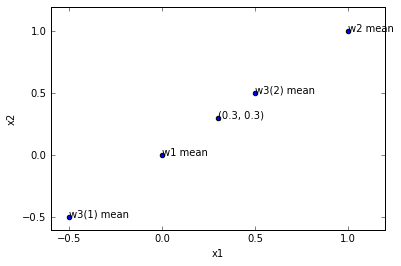

In [198]:
#Code from https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
pts=[-0.5, 0, 1, 0.3, 0.5]
n=["w3(1) mean", "w1 mean", "w2 mean", "(0.3, 0.3)", "w3(2) mean"]

fig, ax = plt.subplots()
ax.scatter(pts, pts)
plt.xlabel("x1")
plt.ylabel("x2")

for i, txt in enumerate(n):
    ax.annotate(txt, (pts[i],pts[i]))

### b) Assigning a class
Assuming 0-1 loss, we can plug in x to each PDF and assign x to whichever class PDF value is greatest

In [227]:
x = np.array([0.3,0.3])

mu1 = np.array([0,0])
mu2 = np.array([1,1])
mu3_1 = np.array([-0.5,-0.5])
mu3_2 = np.array([0.5,0.5])

# cov defaults to Identity matrix
p1 = scipy.stats.multivariate_normal(mean=mu1).pdf(x)
p2 = scipy.stats.multivariate_normal(mean=mu2).pdf(x)
p3 = 0.5*scipy.stats.multivariate_normal(mean=mu3_1).pdf(x)+0.5*scipy.stats.multivariate_normal(mean=mu3_2).pdf(x)

print("P(x given w1) = {}".format(p1))
print("P(x given w2) = {}".format(p2))
print("P(x given w3) = {}".format(p3))
print()
print("Therefore, x will be assigned to w1, since max(P(x given w1), P(x given w1), P(x given w1)) = P(x given w1) = {}".format(p1))

P(x given w1) = 0.1454566657817508
P(x given w2) = 0.09750251890301381
P(x given w3) = 0.1184177921264705

Therefore, x will be assigned to w1, since max(P(x given w1), P(x given w1), P(x given w1)) = P(x given w1) = 0.1454566657817508


---
# 6)

### a) Whitening transform of x

In [243]:
%%latex
$p(x)\sim N\bigg(\begin{bmatrix}0\\0\end{bmatrix},\begin{bmatrix}25&10\\10&15\end{bmatrix}\bigg)$

<IPython.core.display.Latex object>

In [270]:
mu = np.array([0,0])
sigma = np.array([[25, 10],[10, 15]])

delta, phi = np.linalg.eig(sigma)
Aw = phi*(delta**(-1/2))
print("Whitening transform of x = \n{}".format(Aw))

Whitening transform of x = 
[[ 0.15233893 -0.17702628]
 [ 0.09415064  0.28643455]]


### b) Random Patterns Plot

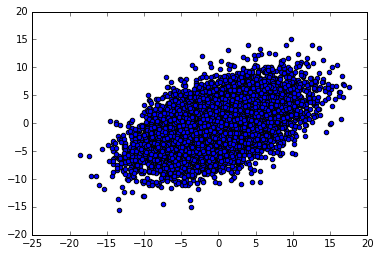

In [266]:
rnd = np.random.multivariate_normal(mu, sigma, 10000)
x = [pair[0] for pair in rnd]
y = [pair[1] for pair in rnd]

plt.scatter(x,y)

### c) Whitening Transform Density Function

In [291]:
%%latex
$p(x)\sim N(A_{w}^t\mu,I) =>$ $$$$
$p(x)\sim N\bigg(\begin{bmatrix}0.152&-0.177\\0.094&0.286\end{bmatrix}^t\begin{bmatrix}0\\0\end{bmatrix},
                 \begin{bmatrix}1&0\\0&1\end{bmatrix}\bigg)$

<IPython.core.display.Latex object>

### d) Random Whitening Transform Patterns Plot

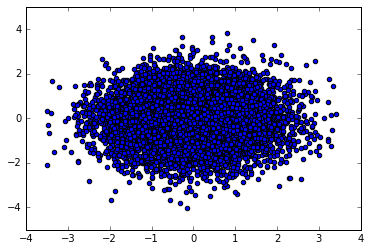

In [280]:
wht_rnd = [np.dot(Aw.T, pair) for pair in rnd]
x = [pair[0] for pair in wht_rnd]
y = [pair[1] for pair in wht_rnd]

plt.scatter(x,y)

Compared to part b,the patterns are distributed in a more circular shape and the shape is not tilted like it was in part b.

# 7)

### a) Bayes decision boundary

In [383]:
%%latex
$N(\mu, \Sigma)=\frac{1}{(2\pi)^{d/2}\begin{vmatrix}\Sigma\end{vmatrix}^{1/2}}
\exp{[\frac{-1}{2}(x-\mu)^{t}\Sigma^{-1}(x-\mu)]}$ $$$$
Since we're computing the boundary, we can set $p(\omega_{1}\mid x)=p(\omega_{2}\mid x)$ and solve for x. $$$$
$p(x\mid\omega_{1})\sim N(\begin{bmatrix}0\\0\end{bmatrix}, 2I)
=>p(\omega_{1}\mid x)=\frac{1}{2}\frac{1}{(2\pi)^{2/2}\begin{vmatrix}2I\end{vmatrix}^{1/2}}
\exp{[\frac{-1}{2}(\begin{bmatrix}x_{1}&x_{2}\end{bmatrix}-\begin{bmatrix}0&0\end{bmatrix})2I^{-1}(\begin{bmatrix}x_{1}\\x_{2}\end{bmatrix}-\begin{bmatrix}0\\0\end{bmatrix})]}$ $$$$
$p(x\mid\omega_{2})\sim N(\begin{bmatrix}2\\2\end{bmatrix}, I)
=>p(\omega_{1}\mid x)=\frac{1}{2}\frac{1}{(2\pi)^{2/2}\begin{vmatrix}I\end{vmatrix}^{1/2}}
\exp{[\frac{-1}{2}(\begin{bmatrix}x_{1}&x_{2}\end{bmatrix}-\begin{bmatrix}2&2\end{bmatrix})I^{-1}(\begin{bmatrix}x_{1}\\x_{2}\end{bmatrix}-\begin{bmatrix}2\\2\end{bmatrix})]}$ $$$$
We can take the natural log of both sides to get rid of the exponential as well as some constant terms since d is the same in both equations. The priors are also equal so we don't have to worry abou those since they will cancel and lastly I divided both sides by $\frac{-1}{2}$.
As a reference, I used equation (69) on page 41 in the textbook.$$$$
$\begin{vmatrix}2I\end{vmatrix} = 4;2I^{-1}=\begin{bmatrix}\frac{1}{2}&0\\0&\frac{1}{2}\end{bmatrix};
\begin{vmatrix}I\end{vmatrix} = 1;I^{-1}=\begin{bmatrix}1&0\\0&1\end{bmatrix}$ $$$$
$ln(4)+\begin{bmatrix}x_{1}&x_{2}\end{bmatrix}\begin{bmatrix}\frac{1}{2}&0\\0&\frac{1}{2}\end{bmatrix}\begin{bmatrix}x_{1}\\x_{2}\end{bmatrix}=
ln(1)+\begin{bmatrix}x_{1}-2&x_{2}-2\end{bmatrix}\begin{bmatrix}1&0\\0&1\end{bmatrix}\begin{bmatrix}x_{1}-2\\x_{2}-2\end{bmatrix}$ $$$$
$=>ln(4)+\frac{x_{1}^2}{2}+\frac{x_{2}^2}{2}=(x_{1}-2)^2+(x_{2}-2)^2$ $$$$
$=>ln(4)+\frac{x_{1}^2}{2}+\frac{x_{2}^2}{2}=x_{1}^2-4x_{1}+4+x_{2}^2-4x_{2}+4$ $$$$
$=>2ln(4)+x_{1}^2+x_{2}^2=2x_{1}^2-8x_{1}+8+2x_{2}^2-8x_{2}+8$ $$$$
$=>2ln(4)-16=x_{1}^2-8x_{1}+x_{2}^2-8x_{2}$ $$$$
Complete the square. $$$$
$=>2ln(4)-16+32=x_{1}^2-8x_{1}+16+x_{2}^2-8x_{2}+16$ $$$$
$=>2ln(4)+16=(x_{1}-4)^2+(x_{2}-4)^2$ $$$$
2d boundary is an ellipse centered at $(4,4)$ with radius $\sqrt{2ln(4)+16}$

<IPython.core.display.Latex object>

### b) Plot Visualization

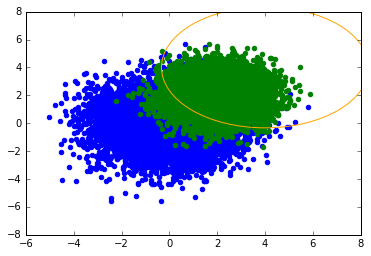

In [442]:
mu1 = np.array([0,0])
sigma1 = np.array([[2,0], [0,2]])
mu2 = np.array([2,2])
sigma2 = np.array([[1,0],[0,1]])

rnd1 = np.random.multivariate_normal(mu1, sigma1, 10000)
rnd2 = np.random.multivariate_normal(mu2, sigma2, 10000)

x1 = [pair[0] for pair in rnd1]
y1 = [pair[1] for pair in rnd1]

x2 = [pair[0] for pair in rnd2]
y2 = [pair[1] for pair in rnd2]

fig,ax = plt.subplots(1)
plt.scatter(x1,y1, color='blue')
plt.scatter(x2,y2, color='green')

#circle help from https://stackoverflow.com/questions/34902477/drawing-circles-on-image-with-matplotlib-and-numpy
circ = matplotlib.patches.Circle((4,4), math.sqrt(2*math.log(4)+16), color="orange", fill=False)
ax.add_patch(circ)

# 8)

### a) Bayes decision rule

In [443]:
%%latex
Assign $x$ to $\omega_{1}$ if $p(\omega_{1}\mid x) > p(\omega_{2}\mid x)$ else assign $x$ to $\omega_{2}$ $$$$
Similar to last problem, but using equation (59) from page 39 because covariance matrices are equal. $$$$
Also, since I started by dividing by $\frac{-1}{2}$, I'll flip the sign. Priors are equal so they cancel out. $$$$
$\begin{bmatrix}x_{1}+1&x_{2}+1\end{bmatrix}I\begin{bmatrix}x_{1}+1\\x_{2}+1\end{bmatrix} < 
\begin{bmatrix}x_{1}-1&x_{2}+1\end{bmatrix}I\begin{bmatrix}x_{1}-1\\x_{2}+1\end{bmatrix}$ $$$$
$=>(x_{1}+1)^2+(x_{2}+1)^2 < (x_{1}-1)^2+(x_{2}-1)^2$ $$$$
$=>x_{1}^2+2x_{1}+1+x_{2}^2+2x_{2}+1 < x_{1}^2-2x_{1}+1+x_{2}^2-2x_{2}+1$ $$$$
$=>4x_{1}<-4x_{2}$ $$$$
$=>-x_{1}>x_{2}$ $$$$
Assign $x$ to $\omega_{1}$ if $-x_{1}>x_{2}$ else assign $x$ to $\omega_{2}$ $$$$

<IPython.core.display.Latex object>

### b) Bounds

In [489]:
%%latex
Reference to page 48 in the textbook. $$$$
$P(error)\leq\sqrt{P(\omega_{1})P(\omega_{2})}\exp[-k(\beta)]$ $$$$
Where $k(\beta) = \frac{\beta(1-\beta)}{2}(\mu_{2}-\mu_{1})^{t}
[\beta\Sigma_{1}+(1-\beta)\Sigma_{2}]^{-1}(\mu_{2}-\mu_{1})
+\frac{1}{2}ln(\frac{\begin{vmatrix}\beta\Sigma_{1}+(1-\beta)\Sigma_{2}\end{vmatrix}}
{\begin{vmatrix}\Sigma_{1}\end{vmatrix}^{\beta}\begin{vmatrix}\Sigma_{2}\end{vmatrix}^{1-\beta}})$ $$$$
$=>\frac{\beta-\beta^2}{2}\begin{bmatrix}2&2\end{bmatrix}
\begin{bmatrix}\beta(1-\beta)&0\\0&\beta(1-\beta)\end{bmatrix}
\begin{bmatrix}2\\2\end{bmatrix}
+\frac{1}{2}ln(\frac{1}{1})$ $$$$
$=>\frac{\beta-\beta^2}{2}\begin{bmatrix}2&2\end{bmatrix}
\begin{bmatrix}1&0\\0&1\end{bmatrix}
\begin{bmatrix}2\\2\end{bmatrix}
+\frac{1}{2}ln(\frac{1}{1})$ $$$$
$=>\frac{\beta-\beta^2}{2}*8$ $$$$
$=>4\beta-4\beta^2$ $$$$
Bhattacharyya bound, set $\beta=\frac{1}{2}$ $$$$
$P(error)\leq\sqrt{\frac{1}{2}*\frac{1}{2}}\exp[-k(\frac{1}{2})]$ $$$$
$P(error)\leq\frac{1}{2}\exp[-k(\frac{1}{2})]$ $$$$
$P(error)\leq\frac{1}{2}\exp[-(4(\frac{1}{2})-4(\frac{1}{2})^2)]$ $$$$
$P(error)\leq\frac{1}{2}\exp[-1]$ $$$$
$P(error)\leq0.184$ $$$$
Chernoff bound, set $\frac{d}{d\beta}k(\beta)=0$ and solve for $\beta$ which will be minimum. $$$$
$\frac{d}{d\beta}[4\beta-4\beta^2]$ $$$$
$=>4-8\beta = 0$ $$$$
$=>\beta=\frac{1}{2}$ which means chernoff bound $=$ Bhattacharyya bound $=0.184$ $$$$

<IPython.core.display.Latex object>

### c) Plots

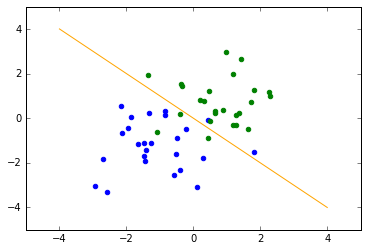

In [492]:
mu1 = np.array([-1,-1])
sigma1 = np.array([[1,0], [0,1]])
mu2 = np.array([1,1])
sigma2 = np.array([[1,0],[0,1]])

rnd1 = np.random.multivariate_normal(mu1, sigma1, 25)
rnd2 = np.random.multivariate_normal(mu2, sigma2, 25)

x1 = [pair[0] for pair in rnd1]
y1 = [pair[1] for pair in rnd1]

x2 = [pair[0] for pair in rnd2]
y2 = [pair[1] for pair in rnd2]

xb = list(range(-4,5))
yb = [-i for i in xb]

fig,ax = plt.subplots(1)
plt.scatter(x1,y1, color='blue')
plt.scatter(x2,y2, color='green')

plt.plot(xb,yb,color="orange")

### d) Confusion Matrix

In [493]:
# Find correctly and incorrectly classified data points
correct_w1, incorrect_w1, correct_w2, incorrect_w2 = 0, 0, 0, 0
for x,y in rnd1:
    if -y-x > 0:
        correct_w1 += 1
    else:
        incorrect_w1 += 1
        
for x,y in rnd2:
    if -y-x > 0:
        incorrect_w2 += 1
    else:
        correct_w2 += 1
            
total = correct_w1+incorrect_w1+correct_w2+incorrect_w2
correct_total = correct_w1 + correct_w2
incorrect_total = incorrect_w1 + incorrect_w2
output = """Correctly classified: {} data points ({} as w1 and {} as w2)
Incorrectly classified: {} data points({} as w1 and {} as w2)
Total: {} data points\nError rate {}/{} = {}"""
print(output.format(correct_total, correct_w1, correct_w2, incorrect_total, incorrect_w1, \
                    incorrect_w2, total, incorrect_total, total, incorrect_total/total))
confusion = np.array([[correct_w1, incorrect_w1],[incorrect_w2, correct_w2]])

print("\nconfusion matrix =")
print(confusion)

Correctly classified: 45 data points (23 as w1 and 22 as w2)
Incorrectly classified: 5 data points(2 as w1 and 3 as w2)
Total: 50 data points
Error rate 5/50 = 0.1

confusion matrix =
[[23  2]
 [ 3 22]]


No, the empircal error cannot exceed the thoeretical bounds. This is because the theoretical bounds are an upper bound on the error, which is saying that the theoretical bound is the maximum possible error. The error may very well be lower than that, but that is the greatest error that might occur.